In [1]:
#### import csv
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# load data from a downloaded data set
pol = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
pol.dropna()

nfs = pol.groupby('neighborhood')['total_count'].sum().sort_values()
print("Total Number of Firearms Seized in Pittsburgh Metropolitain Area from 2015 to 2021")
print(nfs)

Total Number of Firearms Seized in Pittsburgh Metropolitain Area from 2015 to 2021
neighborhood
Swisshelm Park        3
Summer Hill           3
Regent Square         3
Mt. Oliver            3
Oakwood               3
                   ... 
Carrick             133
East Liberty        140
Homewood North      146
South Side Flats    174
Homewood South      300
Name: total_count, Length: 88, dtype: int64


neighborhood
Swisshelm Park           3
Summer Hill              3
Regent Square            3
Mt. Oliver               3
Oakwood                  3
West End                 4
Chartiers City           4
Friendship               5
Lincoln Place            6
St. Clair                7
Fairywood                7
Mount Oliver Borough     8
Banksville               8
Hays                     8
Esplen                   9
Westwood                 9
Polish Hill              9
Arlington Heights       10
Spring Garden           10
Bon Air                 11
Stanton Heights         11
South Shore             11
Windgap                 12
West Oakland            13
Allegheny Center        13
Glen Hazel              14
Upper Lawrenceville     14
Squirrel Hill North     14
Lower Lawrenceville     15
Allegheny West          17
North Shore             17
Duquesne Heights        17
Point Breeze North      18
Central Oakland         18
North Oakland           19
Name: total_count, dtype: int64


Text(0, 0.5, 'Number of Firearms Seized')

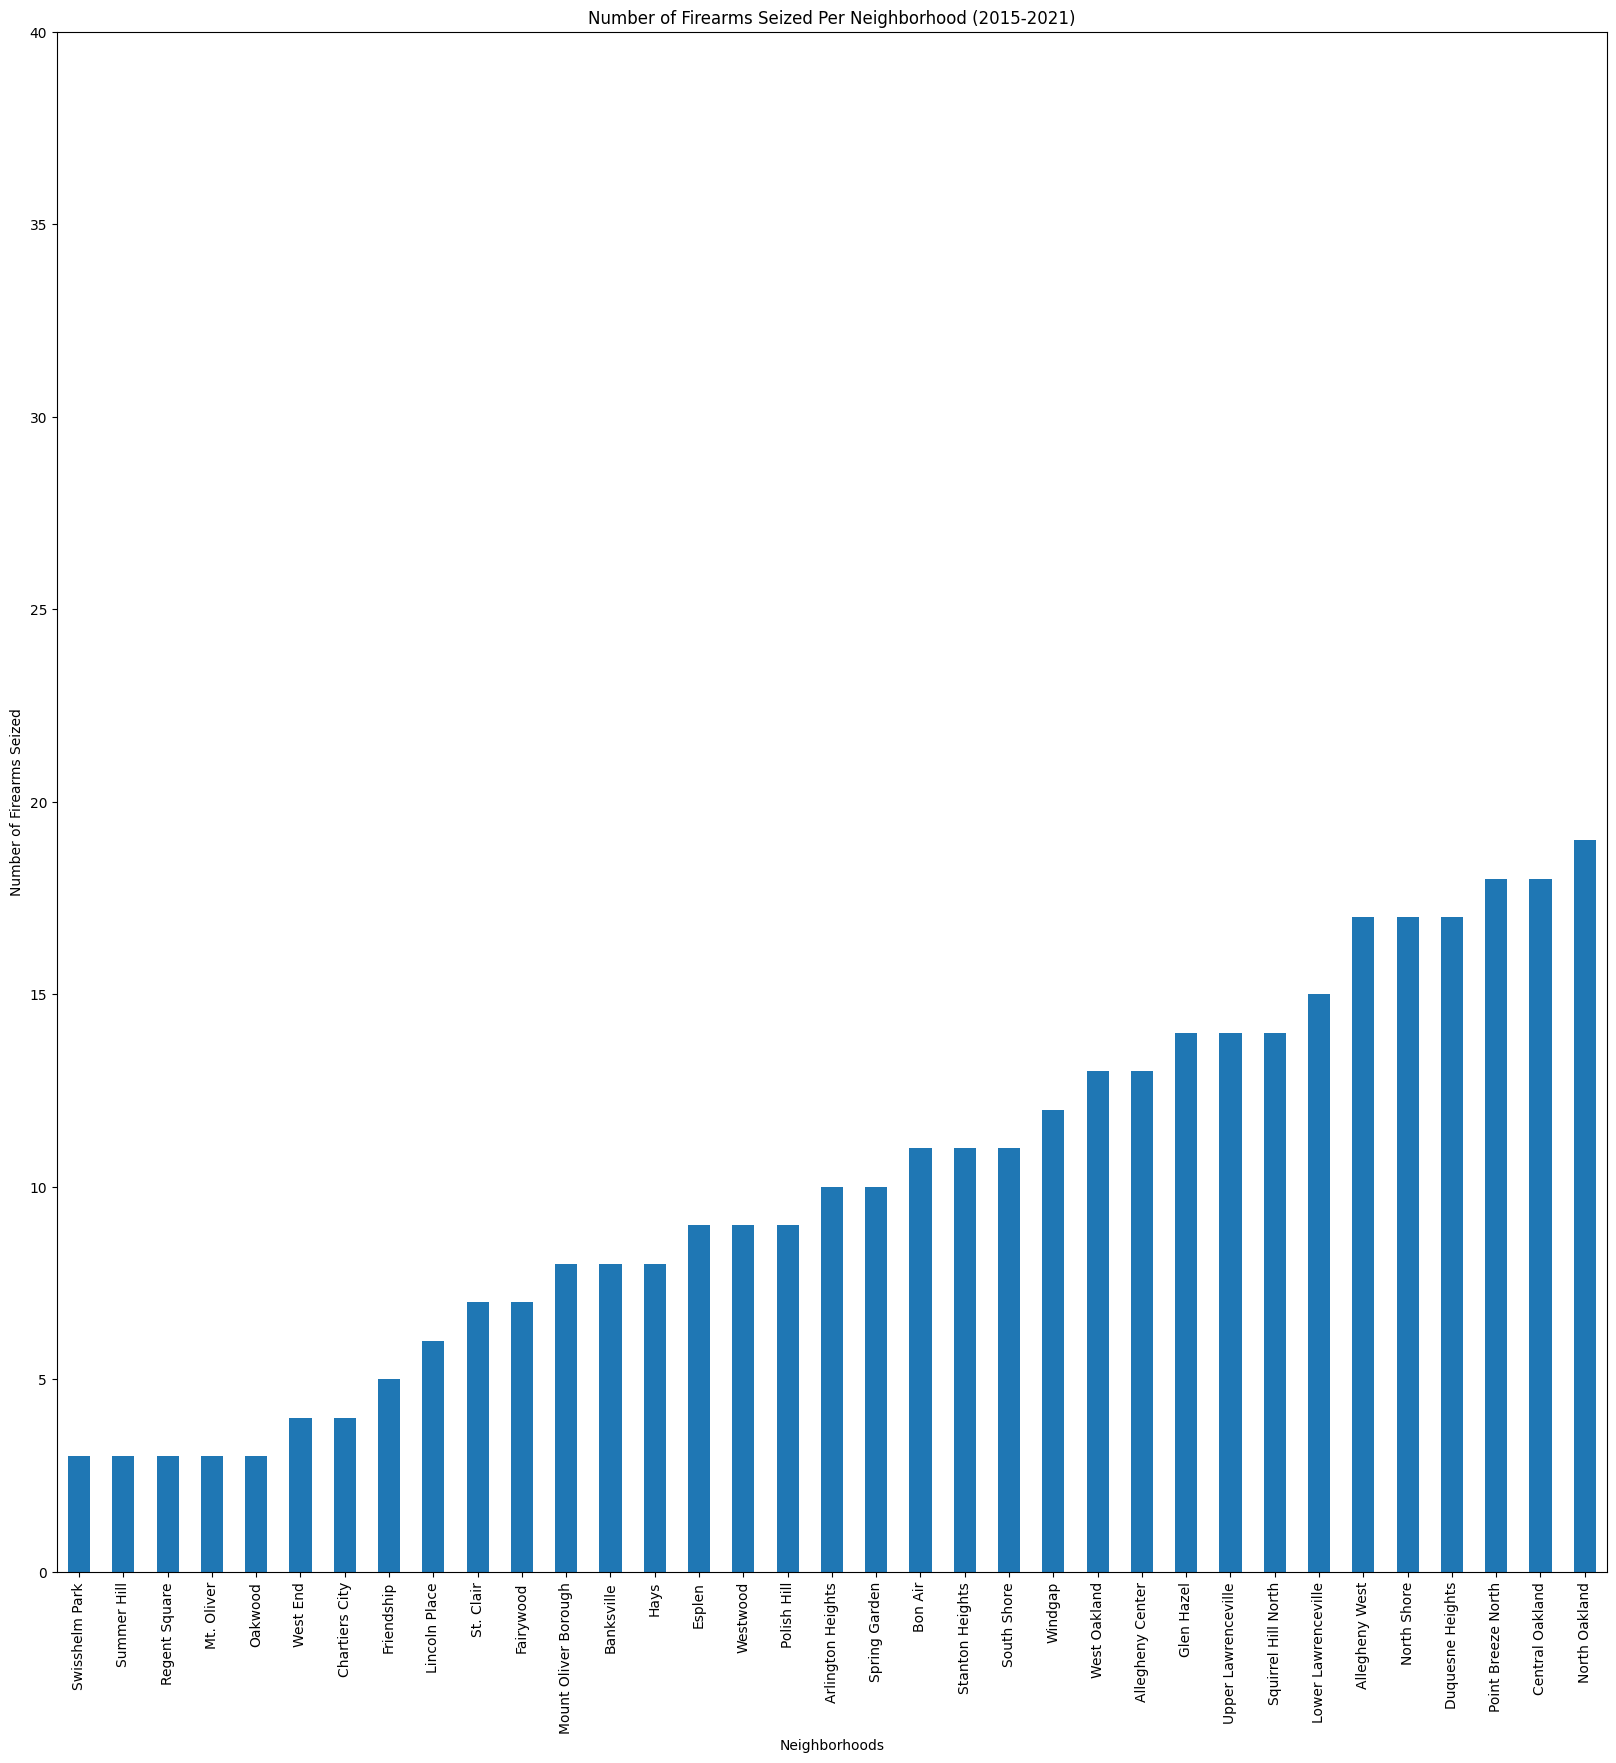

In [4]:
snfs = nfs.head(35)
print(snfs)

#Bar Graph
plt.style.use('default')
snfs.plot.bar(figsize=(20,20), ylim=[0,40])
plt.title("Number of Firearms Seized Per Neighborhood (2015-2021)")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Firearms Seized")

Program: Look through dataset and return total_count of firearm seizures for each neighborhood from 2015 to 2018

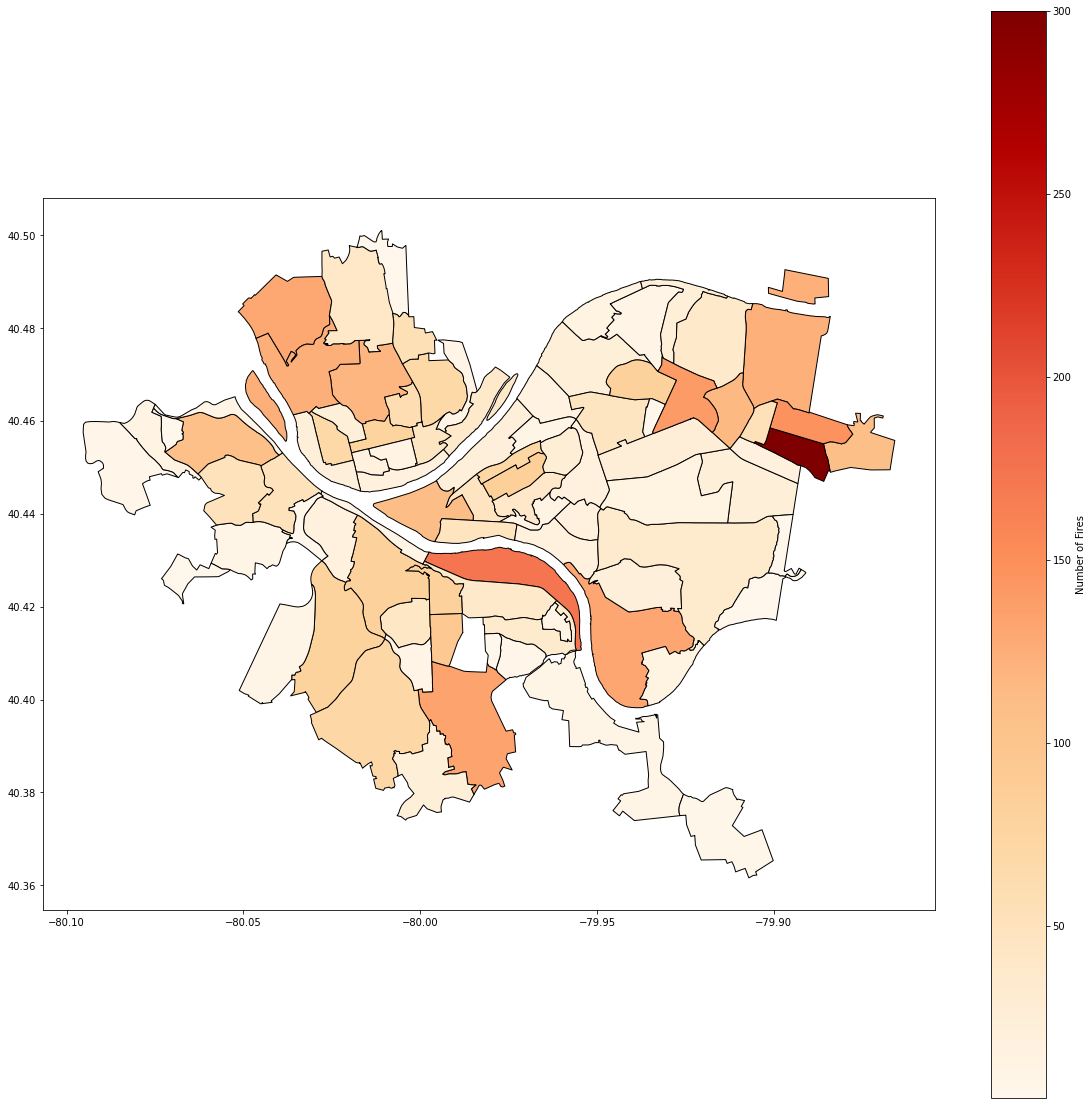

In [5]:
#Heat Map
count = 1
pol["number_of_firearms_seized"] = count
num_fires = pol.groupby("neighborhood").sum()['total_count']
num_fires.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
fire_map = neighborhoods.merge(num_fires, how='left', left_on='hood',right_on='neighborhood')
fire_map.plot(column='total_count', cmap='OrRd', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Fires"}, figsize=(20,20))